## EDA sanity checking plotting and checking missing values 
- Checking 9/11 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_json("data/silver/1920_2024.json")

In [24]:
df

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary,Aboard_Total,Fatalities_Total,Operator_vs_Military
0,1950,1953-01-05,2139,"Belfast, Northern Ireland",British European Airways,None,Northolt - Belfast,Vickers Viking 610-1B,G-AJDL,262,"{'total': 35, 'passengers': 31, 'crew': 4}","{'total': 27, 'passengers': 24, 'crew': 3}",0.0,Crashed into approach lights while attempting ...,35,27,British European Airways
1,1950,1953-01-07,2055,"Issaquah, Washington",Flying Tiger Line,841,Seattle - Cheyenne - Fort Jackson,Douglas C-54B-10-DO,N86574,18350,"{'total': 7, 'passengers': 3, 'crew': 4}","{'total': 7, 'passengers': 3, 'crew': 4}",0.0,The plane struck a tree on a mountain ridge at...,7,7,Flying Tiger Line
2,1950,1953-01-07,0412,"Fish Haven, Idaho",Associated Air Transport,1-6-6A,Boeing Field - Cheyenne,Curtiss C-46,N1648M,22395,"{'total': 40, 'passengers': 37, 'crew': 3}","{'total': 40, 'passengers': 37, 'crew': 3}",0.0,The plane crashed into mountains while en rout...,40,40,Associated Air Transport
3,1950,1953-01-15,0448,"25 nm off Agrigento, Italy",Military -Royal Air Force,-,None,Vickers Valetta Mk1 / Avero Lancaster,VX562 / TX270,None,"{'total': 26, 'passengers': 16, 'crew': 10}","{'total': 26, 'passengers': 16, 'crew': 10}",0.0,Both aircraft crashed after a midair collision...,26,26,Military
4,1950,1953-01-26,1144,"Sinnai, Sardinia, Italy",Linee Aeree Italiane,None,Cagliari - Rome,Douglas DC-3,I-LAIL,4308,"{'total': 19, 'passengers': 15, 'crew': 4}","{'total': 19, 'passengers': 15, 'crew': 4}",0.0,Crashed 10 miles east of Cagliari in the Sinna...,19,19,Linee Aeree Italiane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,1970,1976-12-17,1940,"Ust-Kut, Russia",Aeroflot,None,Ust-Kut - Kirensk,Yakovlev 40,CCCP-88208,9631349,"{'total': 7, 'passengers': 4, 'crew': 3}","{'total': 7, 'passengers': 4, 'crew': 3}",0.0,The cargo plane crashed into trees on takeoff....,7,7,Aeroflot
5033,1970,1976-12-17,21:30,"Kiev, USSR",Aeroflot,H-36,Chernivtsi - Kiev,Antonov AN-24RV,CCCP-46672,47309604,"{'total': 55, 'passengers': 50, 'crew': 5}","{'total': 48, 'passengers': 44, 'crew': 4}",0.0,In heavy fog the crew continued their descend...,55,48,Aeroflot
5034,1970,1976-12-18,1656,"Nnear Yuzhno-Sakhalinsk, Russia",Aeroflot,None,Petropavlovsk-Kamchatsky - Yuzhno-Sakhalinsk,Ilyushin IL-14M,CCCP-61752,147001247,"{'total': 8, 'passengers': 3, 'crew': 5}","{'total': 8, 'passengers': 3, 'crew': 5}",0.0,The survey fllight deviated from the approach ...,8,8,Aeroflot
5035,1970,1976-12-25,0345,"Near Bangkok, Thailand",EgyptAir,864,Cairo - Bangkok,Boeing B-707-366C,SU-AXA,20763,"{'total': 53, 'passengers': 44, 'crew': 9}","{'total': 53, 'passengers': 44, 'crew': 9}",19.0,The aircraft crashed into an industrial area d...,53,53,EgyptAir


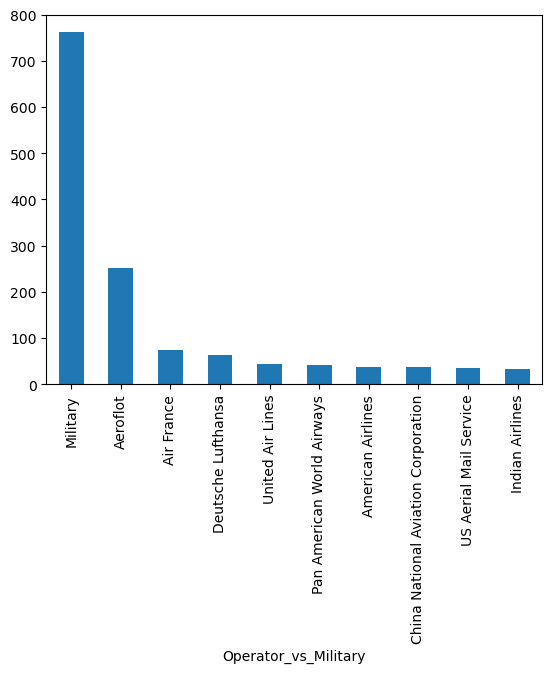

In [25]:
df.Operator_vs_Military.value_counts()[:10].plot(kind="bar")
pass 

In [ ]:
df3.Operator_vs_Military.value_counts()[:5].index

In [ ]:
df4 = df3[df3.Operator_vs_Military.apply(lambda x : x in df3.Operator_vs_Military.value_counts()[:5].index)]

In [ ]:
df3[df3.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum()

In [21]:
df[df.Fatalities.apply(lambda x: isinstance(x["total"],float))]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary


In [ ]:
df3[df3.Operator == 'United Air Lines'].groupby(["Decade"])["Fatalities_Total"].sum().plot(x="Decade", y="Fatalities_Total")
plt()
pass

In [11]:
df.Operator.value_counts()[:5]

Operator
Aeroflot                     252
Military - U.S. Air Force    141
Air France                    74
Deutsche Lufthansa            63
United Air Lines              44
Name: count, dtype: int64

For the two plains in 9/11 the ground was counted twice
- We split the count into two 2750 / 2 

In [4]:
print(df.iloc[2759].Ground / 2)
df.loc[2758, "Ground"] = 1375
df.loc[2759, "Ground"] = 1375

1375.0


Compare Data source with wiki to cross reference dates and fatalities 

In [5]:
df[df.Date == "2001-09-11"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary
2757,2000,2001-09-11,0945,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,"{'total': 64, 'passengers': 58, 'crew': 6}","{'total': 64, 'passengers': 58, 'crew': 6}",125.0,The aircraft was hijacked after taking off fro...
2758,2000,2001-09-11,0847,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,"{'total': 92, 'passengers': 81, 'crew': 11}","{'total': 92, 'passengers': 81, 'crew': 11}",1375.0,The aircraft was hijacked shortly after it lef...
2759,2000,2001-09-11,0903,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,"{'total': 65, 'passengers': 56, 'crew': 9}","{'total': 65, 'passengers': 56, 'crew': 9}",1375.0,The aircraft was hijacked shortly after it lef...
2760,2000,2001-09-11,1003,"Shanksville, Pennsylvania",United Air Lines,93,Newark - San Francisco,Boeing B-757-222,N591UA,28142/718,"{'total': 44, 'passengers': 37, 'crew': 7}","{'total': 44, 'passengers': 37, 'crew': 7}",0.0,The aircraft was hijacked after taking off fro...


In [6]:
df[df.Date == "1977-03-27"]

,Decade,Date,Time,Location,Operator,Flight_Num,Route,Ac_Type,Registration,Cn_Ln,Aboard,Fatalities,Ground,Summary
4639,1970,1977-03-27,1707,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,"{'total': 644, 'passengers': 614, 'crew': 30}","{'total': 583, 'passengers': 560, 'crew': 23}",0.0,Both aircraft were diverted to Tenerife becaus...


In [7]:
df.Date.value_counts()[df.Date.value_counts() > 1]
# Good to know that we can have more than one crash in a single day

Date
2001-09-11    4
1988-08-31    4
1962-11-23    3
1971-07-30    3
1947-05-29    3
             ..
1985-02-19    2
1969-07-26    2
1988-05-26    2
1969-08-03    2
1968-12-24    2
Name: count, Length: 400, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Decade        5037 non-null   int64         
 1   Date          5037 non-null   datetime64[ns]
 2   Time          3529 non-null   object        
 3   Location      5032 non-null   object        
 4   Operator      5026 non-null   object        
 5   Flight_Num    1341 non-null   object        
 6   Route         4273 non-null   object        
 7   Ac_Type       5022 non-null   object        
 8   Registration  4761 non-null   object        
 9   Cn_Ln         4366 non-null   object        
 10  Aboard        5037 non-null   object        
 11  Fatalities    5037 non-null   object        
 12  Ground        4993 non-null   float64       
 13  Summary       4978 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 719.3+ KB
